Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğunu **en az sayıdaki belgeden en çok sayıdaki belgeye doğru** ekrana yazdırılacaktır.

In [5]:
print(df.groupby('kategori').size().sort_values())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Tüzük                            82
Kanun Hükmünde Kararname         91
Genelge                         385
Komisyon Raporu                 500
Kanun                           514
Resmi Gazete                    546
Yönetmelik                      597
Tebliğ                          623
Özelge                          750
dtype: int64


Veriler üzerinde yaptığımız ön çalışmada (ekrana data_text sütunundan / alanından bir kaç satır yazdırılmış ve içerikleri incelenmiştir) veri kümesinin data_text sütunundaki / alanındaki içerik iki parçaya ayrılabileceği görülmüştür. Böylelikle data_text sütunu / alanı işlenirken belgeye ait bilgiler birinci parçada belgenin içeriği ikinci parçada görülebilir. Tüm data_text kayıtlarında yer alan ortak bir noktanın varlığını kontrol etmek için aşağıdaki kod yardımı ile "Resmi belgelerin hepsinde 'Madde 1 ' verisi var mı?" önermesinin doğruluğunu kontrol edeceğiz!

In [6]:
kayitSayisi = 597
say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if df['data_text'][satir].find('Madde 1 -') != -1 and df['kategori'][satir] == 'Yönetmelik':
    say+=1
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam Yönetmelik belgesi sayısı ve her bir kayıtta "Madde 1" verisini içeren Yönetmelik belgelerinin sayısı birbirine eşittir.')
else:
  print('Tüm Yönetmelik belgelerinde aranan veri bulunamamıştır.')

4142 = 4142 yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "Madde 1" verisini içeren kayıt sayısı birbirine eşittir.


Yukarıdaki bulgular doğrultusunda örnek bir kaydı ikiye bölerek **belge ile ilgili verileri toplayabileceğimiz baş kısmı** görelim. Yine bu baş kısmın **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım. Ayrıca dokümanı küçük hafre çevirelim ve lower() komutunun nasıl bir çeviri yaptığını izleyelim.

In [15]:
satir = 2273
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir][:df['data_text'][satir].find('Madde 1')].lower(),sep='')

Kategori:Yönetmelik
-----------------------------------
İçerik:resmî gazete tarihi: 05.11.1995 resmî gazete sayısı: 22454
bi̇ri̇nci̇ kisim
genel hükümler
bi̇ri̇nci̇ bölüm
amaç, kapsam, dayanak ve tanımlar
amaç ve kapsam



Yönetmelik olarak kategori edilen toplam 597 adet kayıt vardır. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturacağız. Bu fonksiyon veriyi analiz edecektir. Mevcut 597 kayıttan kaçında doğru sonuç verdiğini de kontrol edeceğiz.

In [12]:
# Yönetmelik olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulYONETMELIK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  verilenMetin = verilenMetin.replace('i̇','i')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir YÖNETMELİKTİR diye kontrol ediyoruz!
  if verilenMetin.lower().find('yönetmeli')!=-1 or verilenMetin.lower().find('yönetmeli̇')!=-1:
    return 'Yönetmelik'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 597 kayıt arasında kaç tanesinin Yönetmelik olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Yönetmelik kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Yönetmelik':
    continue
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  if kategoriBulYONETMELIK(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1
    print(satir,kategoriBulYONETMELIK(arastirilacakParca),df['kategori'][satir])

print(hataSayisi)

1995 None Yönetmelik
2159 None Yönetmelik
2273 None Yönetmelik
3


Yonetmelik kategorisinde bulduğumuz yöntemin 3 hata ile çalıştığını gördük. 1995, 2159 ve 2273 indisli kayıtlardaki verinin bozuk olduğu; ama şablon ile dokümanın bulunabileceği fark edilmiştir. Kural bazlı olarak ilerleyerek durumun istisnalarını eğer büyük veride sıkıntı yaşarsak değerlendirmek, derin öğrenme veya şablon kullanımı ile problemi çözmek istedik. Karmaşıklık matrisi ile kural bazlı yöntemimizin ne kadar doğru çalıştığını Yönetmelik kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [16]:
# Yönetmelik olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulYONETMELIK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  verilenMetin = verilenMetin.replace('i̇','i')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir YÖNETMELİKTİR diye kontrol ediyoruz!
  if verilenMetin.lower().find('yönetmeli')!=-1 or verilenMetin.lower().find('yönetmeli̇')!=-1:
    return 'Yönetmelik'
  else:
    return 'Yönetmelik Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  fonksiyonumuzunCiktisi = kategoriBulYONETMELIK(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Yönetmelik' and df['kategori'][satir]=='Yönetmelik':
    # Fonksiyonumuz Yönetmelik olan kategoriyi Yönetmelik olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Yönetmelik Değil' and df['kategori'][satir]=='Yönetmelik':
    # Fonksiyonumuz Yönetmelik olan kategoriyi Yönetmelik olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Yönetmelik' and df['kategori'][satir]!='Yönetmelik':
    # Fonksiyonumuz Yönetmelik olmayan kategoriyi Yönetmelik olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Yönetmelik olmayan kategoriyi Yönetmelik olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
594 2956 589 3
Doğruluk (Accuracy): 0.8570738773539353
Keskinlik (Precision): 0.5021132713440406
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 0.9949748743718593
Özgüllük (Specificity): 0.8338504936530324
F1-Puanı (F1 Score): 0.7479096397155272


Bulunan **TP, TN, FP** ve **FN** değerlerine göre **Karmaşıklık Matrisi** görselleştirilecektir.

Görselleştirme için **matplotlib** kütüphanesi kullanılacaktır.
**numpy** kütüphanesi ile diziler üzerinde işlemlerin kolaylaştılması sağlanacaktır.
**sklearn** kütüphanesi ile de tahminlerin kalitesini ölçeceğiz / görselin verilerini hazırlayacağız.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Kaynak 3: https://scikit-learn.org/stable/modules/model_evaluation.html

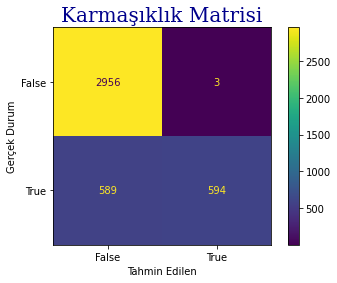

In [17]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulYONETMELIK** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.

- 597 Yönetmelik kategorisinde sınıflandırılan belgenin 3 tanesi hariç hepsini  Yönetmelik kategorisinde sınıflandırabilmiştir.
- 589 Yönetmelik kategorisinde sınıflandırılmayan belgeyi de Yönetmelik olarak sınıflandırmıştır.
- 2956 Yönetmelik kategorisinde sınıflandırılmayan belgeyi de Yönetmelik kategorisinde sınıflandırmamıştır.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
 - **Doğruluk (Accuracy):** 0.8570738773539353
 - **Keskinlik (Precision):** 0.5021132713440406
 - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 0.9949748743718593
 - **Özgüllük (Specificity):** 0.8338504936530324
 - **F1-Puanı (F1 Score):** 0.7479096397155272